# Gradient Descent

In [1]:
import numpy as np
from matplotlib import pyplot as plt

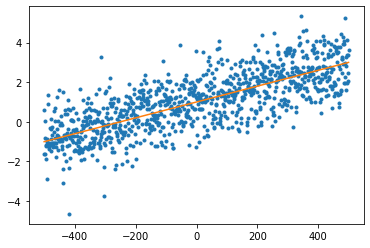

In [241]:
# num points
num_pts = 1000
x_coord = np.linspace(-1,1,num_pts)

# noise
mu = 0
sigma = 1
noise = sigma*np.random.randn(num_pts) + mu

# line params
m = 2
c = 1
y = lambda x: m*x + c
reg = np.array([y(t) for t in x_coord])
reg_target = reg - noise
reg_fit = reg
plt.plot(x, reg_target, '.')
plt.plot(x, reg_fit)

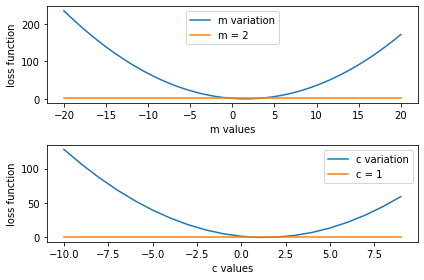

In [318]:
# random sample
idx = np.random.randint(num_pts)
x_val = x_coord[idx]
y_val = reg_target[idx]

# loss-function variation wrt m
m_coord = np.linspace(-10*m, 10*m, 100)
loss_m =  np.array([(y_val - (t*x_val + c))**2 for t in m_coord])

# loss-function variation wrt c
c_coord = np.arange(-10*c, 10*c)
loss_c = np.array([(y_val - (m*x_val + t))**2 for t in c_coord])

# plots
fig, axs = plt.subplots(2)

axs[0].plot(m_coord, loss_m)
axs[0].plot(m_coord, np.ones(len(m_coord))*m)
axs[0].set_xlabel('m values')
axs[0].set_ylabel('loss function')
axs[0].legend(['m variation', 'm = {0}'.format(m)])

axs[1].plot(c_coord, loss_c)
axs[1].plot(c_coord, np.ones(len(c_coord))*c)
axs[1].set_xlabel('c values')
axs[1].set_ylabel('loss function')
axs[1].legend(['c variation', 'c = {0}'.format(c)])

plt.tight_layout()

In [497]:
# gradients
grad_m = lambda x,y,a,b: 2*(y-(a*x+b))*x
grad_c = lambda x,y,a,b: 2*(y-(a*x+b))
# normalize
normalize_func = lambda x, min_val, max_val: (x-min_val)/(max_val-min_val)
vnormalize_func = np.vectorize(normalize_func)
# cost function
get_mse = lambda y, y_pred: np.dot((y-y_pred), (y-y_pred))

In [475]:
# gradient descent
'''
Default batch size = 1 => stochastic gradient descent
'''
def grad_descent(x, y, learn_rate = 0.01, batch_size = 1, epoch = 1, init=3*np.random.randn(2) + 1.5):
    a,b = init
    num_samples = len(x)
    num_batches = num_samples//batch_size
    for i in range(epoch):
        a_coord, b_coord = [], []
        for k in range(num_batches):
            a_batch = 0
            b_batch = 0
            for j in range(k*batch_size, k*batch_size + batch_size):
                x_val, y_val = x[j], y[j]
                a_batch += grad_m(x_val, y_val, a, b)
                b_batch += grad_c(x_val, y_val, a, b)
            a -= (a_batch/batch_size)*learn_rate
            b -= (b_batch/batch_size)*learn_rate
            a_coord.append(a)
            b_coord.append(b)
    return a_coord, b_coord

In [484]:
# without normalization
m_coord, c_coord = grad_descent(x_coord, reg_target, batch_size=10, learn_rate=0.001, epoch=1)
# with normalization
x_coord_norm = vnormalize_func(x_coord, x_coord.min(), x_coord.max())
reg_target_norm = vnormalize_func(reg_target, reg_target.min(), reg_target.max())
m_coord_norm, c_coord_norm = grad_descent(x_coord_norm, reg_target_norm, learn_rate=0.0001,  batch_size=10, epoch=1)

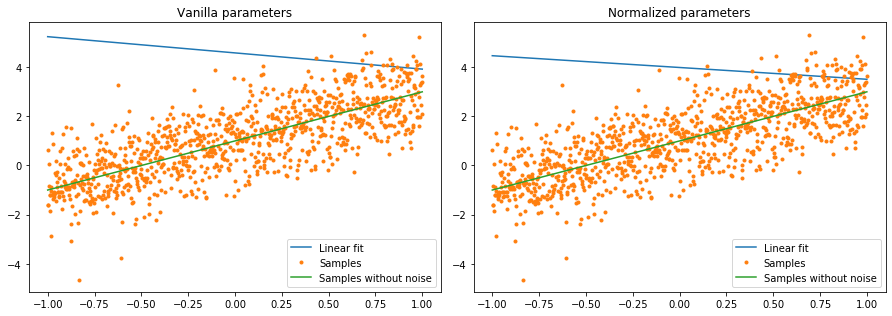

In [485]:
#fig, axs = plt.subplots(2)

au = plt.subplot(1,2,1)
au.plot(x_coord, m_coord[-1]*x_coord + c_coord[-1])
au.plot(x_coord, reg_target, '.')
au.plot(x_coord, reg_fit)
au.legend(['Linear fit', 'Samples', 'Samples without noise'])
au.set_title('Vanilla parameters')

au = plt.subplot(1,2,2)
au.plot(x_coord, m_coord_norm[-1]*x_coord + c_coord_norm[-1])
au.plot(x_coord, reg_target, '.')
au.plot(x_coord, reg_fit)
au.legend(['Linear fit', 'Samples', 'Samples without noise'])
au.set_title('Normalized parameters')

plt.gcf().set_size_inches(12.5, 4.5)
plt.tight_layout()

In [451]:
#learn rates
learn_rates = np.ones(3)
for idx, val in enumerate(learn_rates):
    learn_rates[idx] = val*(10**(idx-3))

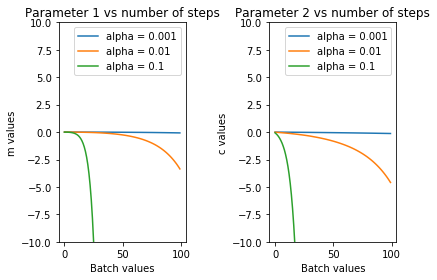

In [489]:
m_coord_alpha, c_coord_alpha = [], []
for idx, val in enumerate(learn_rates):
    m_iter, c_iter = grad_descent(x_coord_norm, reg_target_norm, val, batch_size=10, epoch=1, init=[0,0])
    m_coord_alpha.append(m_iter)
    c_coord_alpha.append(c_iter)

# Plot
au = plt.subplot(1,2,1)
x_data = np.arange(len(m_coord_alpha[0]))
for idx, val in enumerate(m_coord_alpha):
    au.plot(x_data, m_coord_alpha[idx])
au.set_ylim(-10, 10)
au.legend(['alpha = {0}'.format(t) for t in learn_rates])
au.set_xlabel('Batch values')
au.set_ylabel('m values')
au.set_title('Parameter 1 vs number of steps')

au = plt.subplot(1,2,2)
x_data = np.arange(len(c_coord_alpha[0]))
for idx, val in enumerate(c_coord_alpha):
    au.plot(x_data, c_coord_alpha[idx])
au.set_ylim(-10, 10)
au.legend(['alpha = {0}'.format(t) for t in learn_rates])
au.set_xlabel('Batch values')
au.set_ylabel('c values')
au.set_title('Parameter 2 vs number of steps')

plt.tight_layout()

Text(0.5, 1.0, 'Analysis of learning rate')

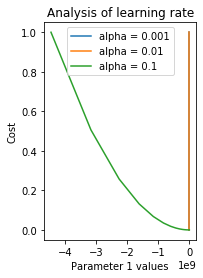

In [516]:
'''
m = 2
c = 1
'''
au = plt.subplot(1,2,1)
for idx, val in enumerate(m_coord_alpha):
    y_data = np.array([get_mse(reg_target, np.array([t*k + c for k in x_coord])) for t in m_coord_alpha[idx]])
    y_data = vnormalize_func(y_data, y_data.min(), y_data.max())
    au.plot(m_coord_alpha[idx], y_data)
au.legend(['alpha = {0}'.format(t) for t in learn_rates])
au.set_xlabel('Parameter 1 values')
au.set_ylabel('Cost')
au.set_title('Analysis of learning rate')